In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
# Load real dataset 
real_df = pd.read_csv("Data/Real_Datasets/wine_processed_dedu.csv")

# Keep only numeric columns
real_num = real_df.select_dtypes(include=[np.number])

# Load synthetic datasets from each model 
CTABGANPlus_num = pd.read_csv("Data/Synthetic_Datasets/CTABGANPlus/run_9.csv").select_dtypes(include=[np.number])
tvae_num        = pd.read_csv("Data/Synthetic_Datasets/TVAE/tvae_run_12.csv").select_dtypes(include=[np.number])
codi_num = pd.read_csv("Data/Synthetic_Datasets/CoDi/codi_aligned.csv").select_dtypes(include=[np.number])
tabsyn_num      = pd.read_csv("Data/Synthetic_Datasets/TabSyn/tabsyn_run_21.csv").select_dtypes(include=[np.number])
ttvae_num = pd.read_csv("Data/Synthetic_Datasets/TTVAE/synthetic_run_14.csv").select_dtypes(include=[np.number])
tabdiff_num = pd.read_csv("Data/Synthetic_Datasets/TabDiff/tabdiff_s1200_b1024_lr0.001.csv").select_dtypes(include=[np.number])
tvaegan_num = pd.read_csv("Data/Synthetic_Datasets/T-VAE-GAN/tvaegan_fake_exp20.csv").select_dtypes(include=[np.number])
gcopula_num = pd.read_csv("Data/Synthetic_Datasets/GaussianCopula/fake_run_1.csv").select_dtypes(include=[np.number])

# Collect into a dict
fake_datasets = {
    "CTABGAN+": CTABGANPlus_num,
    "TVAE": tvae_num,
    "CoDi": codi_num,
    "TabSyn": tabsyn_num,
    "TTVAE": ttvae_num,
    "TabDiff":tabdiff_num,
    "T-VAE-GAN": tvaegan_num,
    "Gaussian Copula": gcopula_num
}


In [4]:
# loading logs
CTABGANPlus_log = pd.read_csv("Experiment_logs/experiment_log_ctabgan.csv")
tvae_log = pd.read_csv("Experiment_logs/experiment_log_tvae.csv")
codi_log = pd.read_csv("Experiment_logs/experiment_log_codi.csv")
tabsyn_log = pd.read_csv("Experiment_logs/experiment_log_tabsyn-.csv")
ttvae_log = pd.read_csv("Experiment_logs/experiment_log_ttvae-.csv")
tabdiff_log = pd.read_csv("Experiment_logs/experiment_log_tabdiff.csv")
tvaegan_log = pd.read_csv("Experiment_logs/experiment_log_tvaegan-.csv")
gcopula_log = pd.read_csv("Experiment_logs/gaussian_experiment_log.csv")



In [5]:
CTABGANPlus_log.head()

,run_id,epochs,batch_size,learning_rate,pearson_mae,spearman_mae,RR_ median,RR_p05,RR_p01,FR_ median,FR_p05,pct_FR_below_RR1pct,near_dop_rate,Eps_ used,train_time_sec,gen_time_sec
0,1,150,500,0.0002,0.047421,0.058285,0.9774,0.2314,0.0771,1.3276,0.8615,0,0,0.0097,171.44,0.13
1,2,300,500,0.0002,0.036652,0.040776,0.9774,0.2314,0.0771,1.2438,0.8122,0,0,0.0097,340.97,0.13
2,3,600,500,0.0002,0.027143,0.034650,0.9774,0.2314,0.0771,1.0146,0.7839,0,0,0.0097,683.76,0.13
3,3,150,256,0.0002,0.040786,0.045400,0.9774,0.2314,0.0771,1.2869,0.8485,0,0,0.0097,293.10,0.13
4,4,150,128,0.0002,0.026402,0.038596,0.9774,0.2314,0.0771,1.3539,0.8776,0,0,0.0097,489.23,0.18


In [6]:
# Add tool column
CTABGANPlus_log["tool"] = "CTABGAN+"
tvae_log["tool"]= "TVAE"
codi_log["tool"]="CoDi"
tabsyn_log["tool"]      = "TabSyn"
ttvae_log["tool"]       = "TTVAE"
tabdiff_log["tool"]= "TabDiff"
tvaegan_log["tool"]="T-VAE-GAN"
gcopula_log["tool"]="Gaussian Copula"


In [7]:
# Combine all logs
all_logs = pd.concat([CTABGANPlus_log, tvae_log, codi_log, tabsyn_log, ttvae_log, tabdiff_log, tvaegan_log, gcopula_log], ignore_index=True)

In [8]:
melted_logs = all_logs.melt(
    id_vars=["tool"],
    value_vars=["pearson_mae", "spearman_mae"],
    var_name="method",
    value_name="mae"
)


In [10]:

# Compute min, median, max for each tool-method
mae_stats = (
    melted_logs
    .groupby(["tool","method"])["mae"]
    .agg(["min","median","max"])
    .reset_index()
    .sort_values(["tool","method"])
)

import pandas as pd
pd.set_option("display.precision", 4)  # nicer formatting
mae_stats


,tool,method,min,median,max
0,CTABGAN+,pearson_mae,0.0264,0.0359,0.1786
1,CTABGAN+,spearman_mae,0.0314,0.0397,0.1874
2,CoDi,pearson_mae,0.0441,0.0590,0.2158
3,CoDi,spearman_mae,0.0656,0.0811,0.2147
4,Gaussian Copula,pearson_mae,0.0131,0.0196,0.0524
5,Gaussian Copula,spearman_mae,0.0166,0.0386,0.0484
6,T-VAE-GAN,pearson_mae,0.0225,0.0376,0.1319
7,T-VAE-GAN,spearman_mae,0.0314,0.0442,0.1366
8,TTVAE,pearson_mae,0.0265,0.0341,0.0619
9,TTVAE,spearman_mae,0.0280,0.0349,0.0563


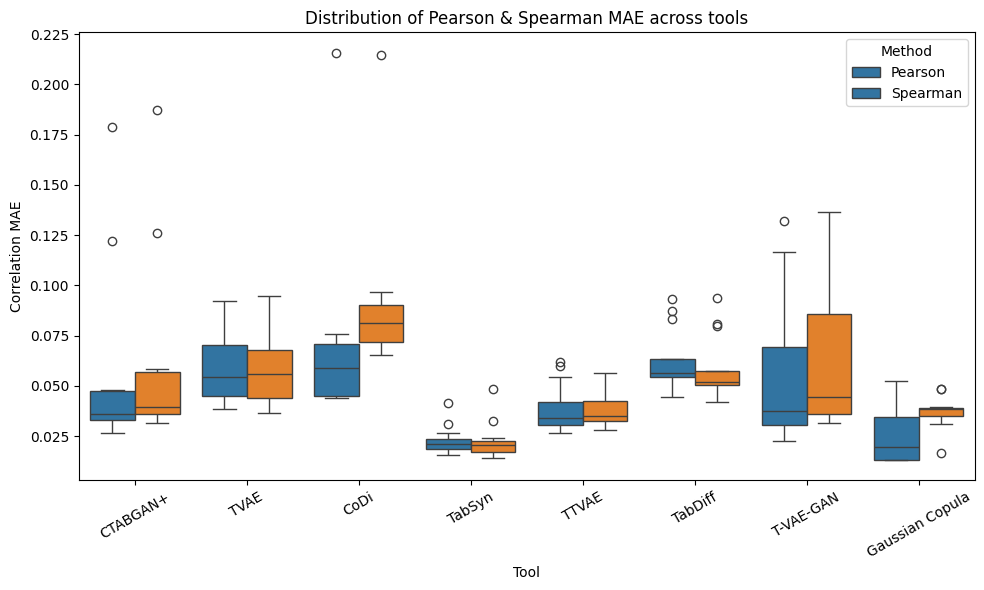

In [12]:
# box plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(x="tool", y="mae", hue="method", data=melted_logs)

plt.ylabel("Correlation MAE")
plt.xlabel("Tool")
plt.title("Distribution of Pearson & Spearman MAE across tools")
plt.legend(title="Method", labels=["Pearson", "Spearman"])
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()



In [14]:
import pandas as pd
import numpy as np

# real correlations 
real_pearson = real_num.corr(method="pearson")
real_spearman = real_num.corr(method="spearman")

# function to compute MAE given synthetic data 
def correlation_mae(fake_df, real_pearson, real_spearman):
    fake_pearson = fake_df.corr(method="pearson")
    fake_spearman = fake_df.corr(method="spearman")

    # Align columns
    common = real_pearson.columns.intersection(fake_pearson.columns)
    real_p = real_pearson.loc[common, common]
    fake_p = fake_pearson.loc[common, common]
    real_s = real_spearman.loc[common, common]
    fake_s = fake_spearman.loc[common, common]

    # Pearson MAE
    pearson_vals = (real_p - fake_p).abs().values[np.triu_indices_from(real_p, k=1)]
    pearson_mae = pearson_vals.mean()

    # Spearman MAE
    spearman_vals = (real_s - fake_s).abs().values[np.triu_indices_from(real_s, k=1)]
    spearman_mae = spearman_vals.mean()

    return pearson_mae, spearman_mae

# compute for each tool 
results = {}
for tool, fake_df in fake_datasets.items():
    p_mae, s_mae = correlation_mae(fake_df, real_pearson, real_spearman)
    results[tool] = {"Pearson": p_mae, "Spearman": s_mae}

# tidy DataFrame 
mae_df = pd.DataFrame(results).T.reset_index().rename(columns={"index":"Tool"})
print(mae_df)


              Tool  Pearson  Spearman
0         CTABGAN+   0.0384    0.0400
1             TVAE   0.0418    0.0417
2             CoDi   0.0481    0.0716
3           TabSyn   0.0176    0.0152
4            TTVAE   0.0289    0.0324
5          TabDiff   0.0471    0.0411
6        T-VAE-GAN   0.0272    0.0344
7  Gaussian Copula   0.0143    0.0421


In [18]:
import numpy as np
import pandas as pd
from itertools import combinations

def align_numeric_cols(real_df, fake_df):
    """Keep only numeric columns present in BOTH, same order, and drop zero-variance cols in either."""
    real_num = real_df.select_dtypes(include=[np.number]).copy()
    fake_num = fake_df.select_dtypes(include=[np.number]).copy()

    common = [c for c in real_num.columns if c in fake_num.columns]
    real_num = real_num[common]
    fake_num = fake_num[common]

    # Drop columns with zero variance in either dataset
    keep = [c for c in common
            if real_num[c].std(ddof=0) > 0 and fake_num[c].std(ddof=0) > 0]
    if len(keep) < len(common):
        dropped = list(set(common) - set(keep))
        print("Dropped zero-variance cols:", dropped)

    return real_num[keep], fake_num[keep]

def corr_pair(df, method):
    return df.corr(method=method)

def correlation_matrices(real_df, fake_df, methods=("pearson","spearman")):
    """Returns dict like: {'pearson': (real_corr, fake_corr, diff), 'spearman': (...)}"""
    r, f = align_numeric_cols(real_df, fake_df)
    results = {}
    for m in methods:
        rc = corr_pair(r, m)
        fc = corr_pair(f, m)
        # ensure identical index/columns before diff
        rc = rc.loc[r.columns, r.columns]
        fc = fc.loc[r.columns, r.columns]
        results[m] = (rc, fc, rc - fc)
    return results

def mae_from_diff(diff_mat):
    """Mean absolute error over the upper triangle (exclude diagonal)."""
    k = diff_mat.shape[0]
    mask = ~np.eye(k, dtype=bool)
    vals = diff_mat.where(mask).abs().stack().values
    return float(np.mean(vals)) if len(vals) else np.nan

def trend_analysis(real_corr, fake_corr, diff_corr, threshold=0.0):
    """
    % of pairs that weakened vs strengthened in absolute value.
    threshold lets you ignore tiny changes (set to 0.0 to count all).
    """
    cols = real_corr.columns
    weaken = strengthen = total = sign_flips = 0
    for i, j in combinations(range(len(cols)), 2):
        r = real_corr.iat[i, j]
        f = fake_corr.iat[i, j]
        d = f - r  # change relative to real
        if abs(d) <= threshold:
            continue
        total += 1
        if abs(f) < abs(r):
            weaken += 1
        elif abs(f) > abs(r):
            strengthen += 1
        if np.sign(r) != np.sign(f) and abs(r) > 0 and abs(f) > 0:
            sign_flips += 1
    pct_w = 100 * weaken / total if total else 0.0
    pct_s = 100 * strengthen / total if total else 0.0
    pct_flip = 100 * sign_flips / total if total else 0.0
    return pct_w, pct_s, pct_flip

def summarize_shifts(real_corr, fake_corr, diff_corr, method, tool, top_n=5):
    """Table of top |diff| pairs."""
    rows = []
    cols = real_corr.columns
    for i, j in combinations(range(len(cols)), 2):
        a, b = cols[i], cols[j]
        r = real_corr.iat[i, j]
        f = fake_corr.iat[i, j]
        d = r - f
        rows.append({
            "tool": tool,
            "method": method,
            "pair": f"{a} ~ {b}",
            "real": r,
            "fake": f,
            "diff": d,
            "abs_diff": abs(d),
            "sign_flip": np.sign(r) != np.sign(f) and abs(r) > 0 and abs(f) > 0,
            "weakened": abs(f) < abs(r),
        })
    df = pd.DataFrame(rows).sort_values("abs_diff", ascending=False)
    return df.head(top_n)


In [19]:

def analyze_generators(real_df, fake_datasets, top_n=5):
    all_top = []
    summaries = []  

    for tool, fake_df in fake_datasets.items():
        corrs = correlation_matrices(real_df, fake_df)
        for method, tup in corrs.items():
            rc, fc, dfc = tup
            mae = mae_from_diff(dfc)
            w, s, flip = trend_analysis(rc, fc, dfc)

            
            summaries.append({
                "Tool": tool,
                "Method": method.capitalize(),
                "MAE": round(mae, 4),
                "Weakened": f"{w:.1f}%",
                "Strengthened": f"{s:.1f}%",
                "Sign flips": f"{flip:.1f}%"
            })

            # Keep top-N shifts
            top = summarize_shifts(rc, fc, dfc, method, tool, top_n=top_n)
            all_top.append(top)

    summary_df = pd.DataFrame(summaries)

    
    try:
        from tabulate import tabulate
        print(tabulate(summary_df, headers="keys", tablefmt="grid", showindex=False))
    except ImportError:
        
        print(summary_df.to_string(index=False))

    all_top_shifts = pd.concat(all_top, ignore_index=True) if all_top else pd.DataFrame()
    return all_top_shifts, summary_df


all_top_shifts, summary_df = analyze_generators(real_num, fake_datasets, top_n=5)


+-----------------+----------+--------+------------+----------------+--------------+
| Tool            | Method   |    MAE | Weakened   | Strengthened   | Sign flips   |
+=================+==========+========+============+================+==============+
| CTABGAN+        | Pearson  | 0.0384 | 43.9%      | 56.1%          | 7.6%         |
+-----------------+----------+--------+------------+----------------+--------------+
| CTABGAN+        | Spearman | 0.04   | 50.0%      | 50.0%          | 4.5%         |
+-----------------+----------+--------+------------+----------------+--------------+
| TVAE            | Pearson  | 0.0418 | 37.9%      | 62.1%          | 1.5%         |
+-----------------+----------+--------+------------+----------------+--------------+
| TVAE            | Spearman | 0.0417 | 45.5%      | 54.5%          | 7.6%         |
+-----------------+----------+--------+------------+----------------+--------------+
| CoDi            | Pearson  | 0.0481 | 40.9%      | 59.1%       

comparing tools with common setup

In [28]:
from tabulate import tabulate
import pandas as pd

logs = {
    "TVAE": tvae_log,
    "CoDi": codi_log,
    "TabSyn": tabsyn_log,
    "TTVAE": ttvae_log,
    "TabDiff": tabdiff_log,
    "T-VAE-GAN": tvaegan_log,
}

results = []

for tool, df in logs.items():
    df = df.copy()
    
    #  Normalize column names for training time 
    for col in df.columns:
        if col.lower() in ["train_time", "train_time_sec", "training_time"]:
            df = df.rename(columns={col: "train_time"})
    
    # Other normalizations 
    if "steps" in df.columns and "epochs" not in df.columns:
        df = df.rename(columns={"steps": "epochs"})
    if "lr" in df.columns and "learning_rate" not in df.columns:
        df = df.rename(columns={"lr": "learning_rate"})
    
    #  Filter to common config
    mask = (df["epochs"] == 600) & (df["batch_size"].isin([500, 512]))
    candidates = df[mask]
    
    if len(candidates) == 0:
        results.append([tool, None, None, None])
        continue
    
    # Prefer lr=0.001 if multiple
    if "learning_rate" in candidates.columns:
        chosen = candidates[candidates["learning_rate"] == 0.001]
        if len(chosen) == 0:
            chosen = candidates.iloc[[0]]
    else:
        chosen = candidates.iloc[[0]]
    
    row = chosen.iloc[0]
    results.append([
        tool,
        row.get("pearson_mae", None),
        row.get("spearman_mae", None),
        row.get("train_time", None)  # now unified
    ])

#  Build final df
final_df = pd.DataFrame(results, columns=["Tool", "Pearson MAE", "Spearman MAE", "Training Time"])
final_df = final_df.sort_values(by="Pearson MAE", ascending=True).reset_index(drop=True)
final_df[["Pearson MAE", "Spearman MAE"]] = final_df[["Pearson MAE", "Spearman MAE"]].round(3)

#  print 
print(tabulate(final_df, headers="keys", tablefmt="grid", showindex=False))


+-----------+---------------+----------------+-----------------+
| Tool      |   Pearson MAE |   Spearman MAE |   Training Time |
+===========+===============+================+=================+
| TabSyn    |         0.026 |          0.024 |           48.59 |
+-----------+---------------+----------------+-----------------+
| TTVAE     |         0.054 |          0.043 |          248.32 |
+-----------+---------------+----------------+-----------------+
| TabDiff   |         0.056 |          0.056 |          604.84 |
+-----------+---------------+----------------+-----------------+
| TVAE      |         0.069 |          0.066 |           39.09 |
+-----------+---------------+----------------+-----------------+
| CoDi      |         0.076 |          0.087 |          218.41 |
+-----------+---------------+----------------+-----------------+
| T-VAE-GAN |         0.109 |          0.124 |           43.78 |
+-----------+---------------+----------------+-----------------+


In [29]:
# Counting how often each pair is in top-N
pair_counts = (
    all_top_shifts
    .groupby("pair")
    .size()
    .reset_index(name="count")
    .sort_values("count", ascending=False)
)

print(pair_counts.head(10))

                                     pair  count
4                   chlorides ~ sulphates      6
31         volatile acidity ~ citric acid      5
7       citric acid ~ free sulfur dioxide      4
17               residual sugar ~ alcohol      4
18               residual sugar ~ density      3
15   fixed acidity ~ total sulfur dioxide      3
35           volatile acidity ~ sulphates      3
34      volatile acidity ~ residual sugar      3
30           volatile acidity ~ chlorides      3
23  residual sugar ~ total sulfur dioxide      3


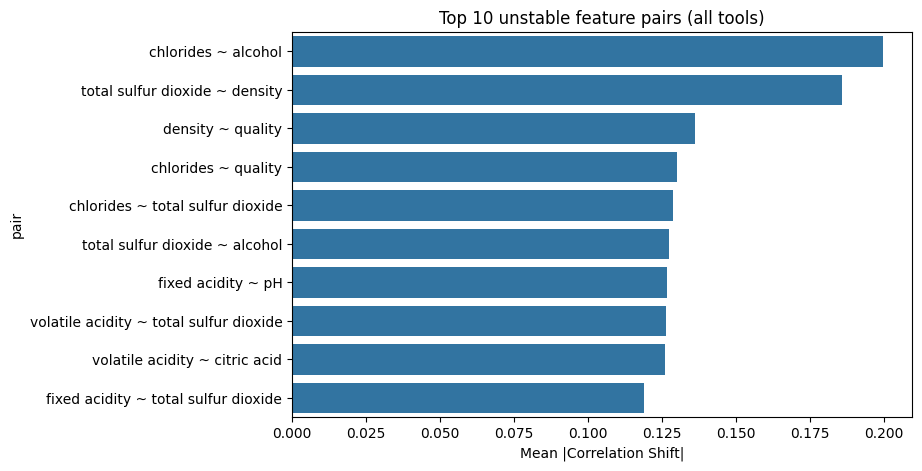

In [23]:
pair_counts = (
    all_top_shifts.groupby("pair")["abs_diff"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(8,5))
sns.barplot(x=pair_counts.values, y=pair_counts.index, orient="h")
plt.xlabel("Mean |Correlation Shift|")
plt.title("Top 10 unstable feature pairs (all tools)")
plt.show()


In [25]:
from collections import Counter

# Split "a ~ b" into individual features
feature_counts = Counter()
for pair in all_top_shifts["pair"]:
    a, b = pair.split(" ~ ")
    feature_counts[a] += 1
    feature_counts[b] += 1

feature_df = pd.DataFrame(feature_counts.items(), columns=["feature", "count"])
feature_df = feature_df.sort_values("count", ascending=False)

print(feature_df.head(10))


                 feature  count
6       volatile acidity     21
3              chlorides     20
8         residual sugar     20
4   total sulfur dioxide     18
1              sulphates     16
2            citric acid     15
11               density     11
7                quality     10
9                alcohol     10
5          fixed acidity      7


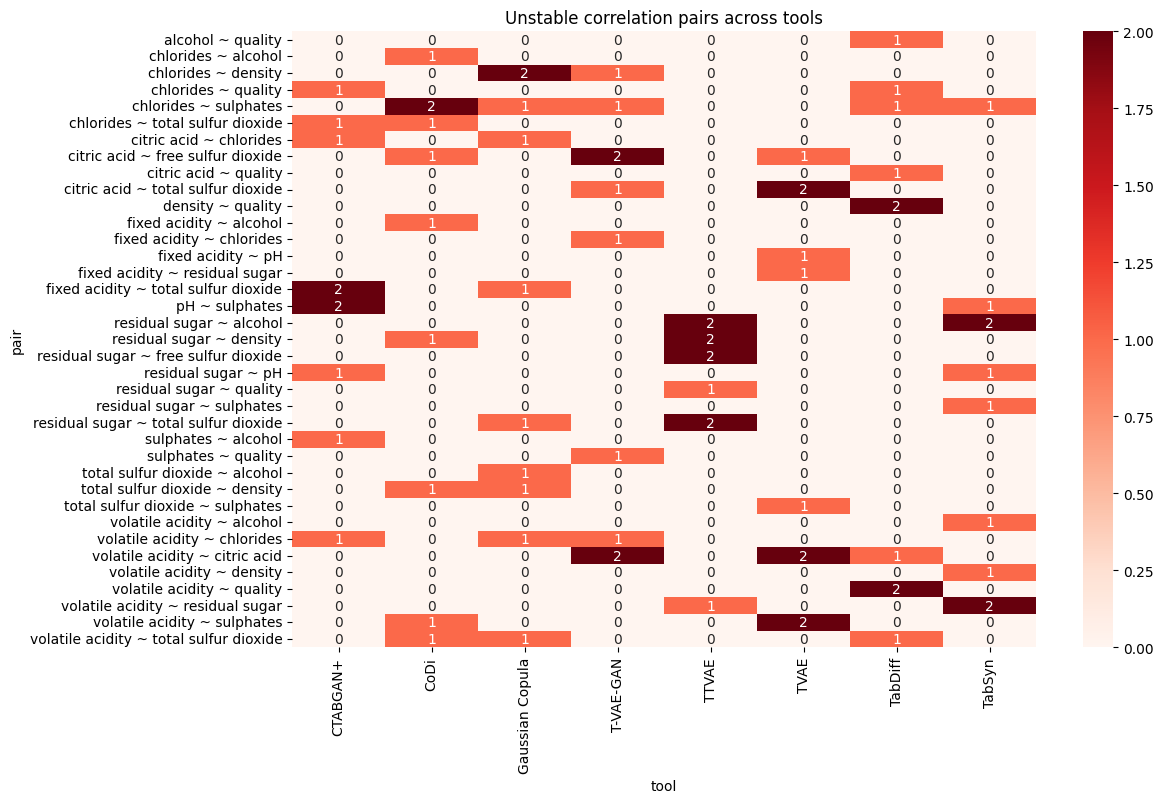

In [26]:
tool_pair_counts = (
    all_top_shifts.groupby(["pair","tool"])
    .size()
    .reset_index(name="count")
)

pivot = (
    tool_pair_counts.pivot(index="pair", columns="tool", values="count")
    .fillna(0)
    .astype(int)
)

plt.figure(figsize=(12,8))
sns.heatmap(pivot, cmap="Reds", annot=True, fmt="d")
plt.title("Unstable correlation pairs across tools")
plt.show()


In [27]:
from tabulate import tabulate
import pandas as pd
import numpy as np

# Manual meta info (Method, Data-Copying Risk, Training Time, Distance Corr MAE)
meta = {
    "CTABGAN+": {"Method": "GAN", "Data-Copying Risk": "✗", "Training Time": "Medium", "Distance Corr MAE": 0.32},
    "TVAE": {"Method": "VAE", "Data-Copying Risk": "✗", "Training Time": "Slow", "Distance Corr MAE": 0.037},
    "CoDi": {"Method": "Diffusion", "Data-Copying Risk": "✗", "Training Time": "Medium", "Distance Corr MAE": 0.046},
    "TabSyn": {"Method": "Diffusion + VAE", "Data-Copying Risk": "✗", "Training Time": "Fast", "Distance Corr MAE": 0.013},
    "TTVAE": {"Method": "Transformer + VAE", "Data-Copying Risk": "✗", "Training Time": "Medium", "Distance Corr MAE": 0.029},
    "TabDiff": {"Method": "Transformer + Diffusion", "Data-Copying Risk": "✗", "Training Time": "Slow", "Distance Corr MAE": 0.051},
    "T-VAE-GAN": {"Method": "VAE + GAN", "Data-Copying Risk": "✗", "Training Time": "Slow", "Distance Corr MAE": 0.034},
    "Gaussian Copula": {"Method": "Theory-based", "Data-Copying Risk": "✗", "Training Time": "Fast", "Distance Corr MAE": 0.063}
}

# Compute Pearson & Spearman MAEs from datasets
def correlation_maes(fake_df, real_pearson, real_spearman):
    fake_pearson = fake_df.corr(method="pearson")
    fake_spearman = fake_df.corr(method="spearman")

    common = real_pearson.columns.intersection(fake_pearson.columns)

    # Pearson MAE
    diff_p = (real_pearson.loc[common, common] - fake_pearson.loc[common, common]).abs()
    pearson_vals = diff_p.values[np.triu_indices_from(diff_p, k=1)]
    pearson_mae = pearson_vals.mean()

    # Spearman MAE
    diff_s = (real_spearman.loc[common, common] - fake_spearman.loc[common, common]).abs()
    spearman_vals = diff_s.values[np.triu_indices_from(diff_s, k=1)]
    spearman_mae = spearman_vals.mean()

    return pearson_mae, spearman_mae

real_pearson = real_num.corr(method="pearson")
real_spearman = real_num.corr(method="spearman")

results = []
for tool, fake_df in fake_datasets.items():
    p_mae, s_mae = correlation_maes(fake_df, real_pearson, real_spearman)
    results.append([
        meta[tool]["Method"],
        tool,
        round(p_mae, 3),
        round(s_mae, 3),
        meta[tool]["Distance Corr MAE"],
        meta[tool]["Data-Copying Risk"],
        meta[tool]["Training Time"]
    ])

# Sort by Pearson MAE
results = sorted(results, key=lambda x: x[2])

# Pretty print
headers = ["Method", "Model", "Pearson MAE", "Spearman MAE", "Distance Corr MAE", "Data-Copying Risk", "Training Time"]
print(tabulate(results, headers=headers, tablefmt="github"))


| Method                  | Model           |   Pearson MAE |   Spearman MAE |   Distance Corr MAE | Data-Copying Risk   | Training Time   |
|-------------------------|-----------------|---------------|----------------|---------------------|---------------------|-----------------|
| Theory-based            | Gaussian Copula |         0.014 |          0.042 |               0.063 | ✗                   | Fast            |
| Diffusion + VAE         | TabSyn          |         0.018 |          0.015 |               0.013 | ✗                   | Fast            |
| VAE + GAN               | T-VAE-GAN       |         0.027 |          0.034 |               0.034 | ✗                   | Slow            |
| Transformer + VAE       | TTVAE           |         0.029 |          0.032 |               0.029 | ✗                   | Medium          |
| GAN                     | CTABGAN+        |         0.038 |          0.04  |               0.32  | ✗                   | Medium          |
| VAE        